
# Project: Investigate a Dataset - [Medical No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will analyze and communicate my findings about a Medical No-show Appointment [dataset](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&source=editors&ust=1659480994388182&usg=AOvVaw0zZDSpomJo-ZBKOrcFY-uV), using Python libraries: Numpy, Pandas, Matplotlib and Seaborn. I will find out how different factors affect no-show rate and the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment

### Dataset Description 

> This dataset collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row, they are:
* __‘PatientId’__ - identification number of each patient.
* __‘AppointmentId’__ - identification number of each appointment.
* __‘Gender’__ - tells us if the patient is a Male or Female.
* __‘ScheduledDay’__ - on what day the patient set up their appointment.
* __‘AppointmentDay’__ - the day of the actual appointment.
* __‘Age’__ - how old the patient is.
* __‘Neighborhood’__ - indicates the location of the hospital.
* __‘Scholarship’__ - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* __‘Hipertension’__ - ‘1’ if True or ‘0’ if False.
* __‘Diabetes’__ - ‘1’ if True or ‘0’ if False.
* __‘Alcoholism’__ - ‘1’ if True or ‘0’ if False.
* __‘Handcap’__ - tells us if the patient has 1 or more handicap.
* __‘SMS_received’__ - tells us if 1 or more messages were sent to the patient.
* __‘No-show’__ - ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.




### Questions for Analysis
* How many percent of patients missed their scheduled appointment?
* What is gender distribution for show/no-show patients? Is gender an important factor to predict if a patient will show up for their scheduled appointment?
* How does wait time affect show up rate?
* How does appointment day of the week affect show up rate?
* What is the age distribution for show/no-show patients? What age-group is most likely to miss an appointment?
* What are the top 5 Neighbourhoods based on the number of no-show appointments?
* What other factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


### Importing Needed Packages

In [49]:
# importing all of the packages that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Here, I will load in the data, assess its general properties, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

In [50]:
# Loading the data and returning the first five lines in our dataframe

df = pd.read_csv('Database_No_show_appointments/noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__OBSERVATION:__ The ScheduledDay has a time part, while the time part is not given in the AppointmentDay; The column names are messy and can be made clearer.

In [51]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

__OBSERVATION:__ There are 110527 rows (appointments) and 14 columns (variables).

In [52]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


__OBSERVATIONS:__ There are no null/missing data in all the columns in the dataframe. The ScheduledDay and AppointmentDay has incorrect datatype (object) and should be converted from str to datetime.

In [53]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

__OBSERVATIONS:__ 

* There are 62299 unique PatientId, hence some patients had more than 1 appointment.
* The dataset covered appointments made within 27 working days.
* Some persons had more than 1 handicap.
* There are 81 unique locations/neighbourhood.

In [54]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


__OBSERVATION:__ The average age of patients is 37, the highest age recorded is 115 while the minimum age is -1 and this is an error that will be fixed; Also it can be observed that the maximum handicap is 4.


### Data Cleaning
 On assessing the dataset, it was discovered that there are no cases of missing values. However, the dataset will also be examined for duplicates; Extraneous columns will be dropped; The ScheduledDay and AppointmentDay had incorrect datatype and will be converted from str to datetime; The column names would be adjusted in order to improve clarity; the minimum age (-1) error will be rectified and new useful columns would be added.

#### Check for duplicates

In [55]:
sum(df.duplicated())

0

There are no duplicates in the dataframe.

#### Fix Data Types

In [56]:
# coverting str to datetime
df['ScheduledDay'] = pd.to_datetime(pd.to_datetime(df['ScheduledDay']).dt.date)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [57]:
# confirming the correction in the datatype
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [58]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Rename Columns

In [59]:
df.columns = ['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show']

In [60]:
list(df.columns)

['patient_id',
 'appointment_id',
 'gender',
 'scheduled_day',
 'appointment_day',
 'age',
 'neighbourhood',
 'scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received',
 'no_show']

#### Fix incorrect data

In [61]:
# rectifying the minimum age error.
# finding the data with the error
negative_age = df.query('age < 0')
negative_age

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


This is definitely an entry error as age can't be less than zero. I will correct the age to be 1.

In [62]:
# converting the age with -1 to 1
df['age'] = df['age'].apply(lambda x : x if x > 0 else 1)

In [63]:
#confirming the change
negative_age = df.query('age < 0')
negative_age

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


### Addition of new useful columns

#### Wait Time

In [64]:
# calculate days between scheduled_day and appointment_day
wait_time = (df['appointment_day'] - df['scheduled_day']).dt.days

df.insert(5, 'wait_time', wait_time)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Week Day (Day of the appointment)

In [65]:
# find the day of the week the appointment fell on
week_day = df.appointment_day.dt.weekday
# insert the new column into the dataset
df.insert(5, 'week_day', week_day)
df['week_day'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: week_day, dtype: int64

In [66]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,week_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,4,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No


__Drop Extraneous Columns__

In [67]:
# dropping patient_id, scheduled_day, and appointment day
df.drop(['patient_id', 'scheduled_day', 'appointment_day'], axis = 1, inplace = True)

In [68]:
# viewing how the dataset looks like now
df.head(1)

,appointment_id,gender,week_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,4,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: How many percent of patients missed their scheduled appointment? 

__No-show Distribution__

In [69]:
# count of the number of people that showed up (No) and those that did not show up (Yes)
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In 88208 appointments, patients showed up while 22319 appointments were missed.

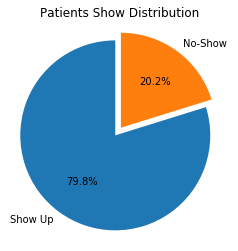

In [70]:
# plotting a pie chart showing the percentage of patients in each group
# Data to plot
labels = 'Show Up', 'No-Show'
sizes = df['no_show'].value_counts()
explode = (0, 0.1)

# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('square')
plt.title('Patients Show Distribution');

20.2% of the appointments were missed.

### Question 2: What is gender distribution for show/no-show patients?  Is gender an important factor to predict if a patient will show up for their scheduled appointment?

__Gender Distribution of Appointments__

In [71]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

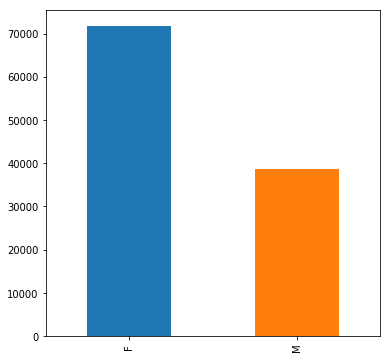

In [72]:
df['gender'].value_counts().plot(kind='bar', figsize = (6, 6));

The appointments were scheduled by mostly female patients.

__Gender Distribution of Show/No-show Appointments__

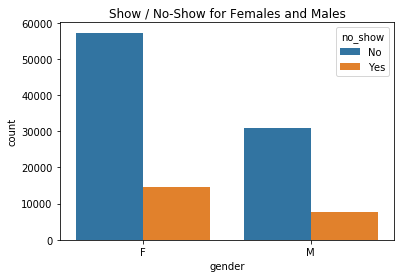

In [73]:
all_appointments_by_f = len(df.query('gender == "F"'))
all_appointments_by_m = len(df.query('gender == "M"'))

missed_appointments_by_f = len(df.query('no_show == "Yes" and gender == "F"'))
missed_appointments_by_m = len(df.query('no_show == "Yes" and gender == "M"'))

missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

ax = sns.countplot(x=df.gender,hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

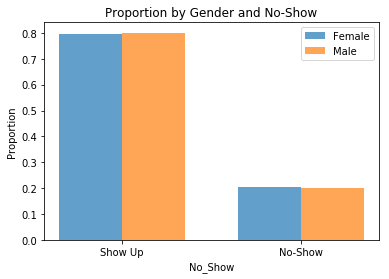

In [74]:
gender_count = df.groupby(['gender', 'no_show']).count()['appointment_id']
gender_total = df.groupby(['gender']).count()['appointment_id']
female_proportion = gender_count['F']/gender_total['F']
male_proportion = gender_count['M']/gender_total['M']

ind = np.arange(len(female_proportion))
width = 0.35

female_bars = plt.bar(ind, female_proportion, width, alpha=.7, label='Female')
male_bars = plt.bar(ind + width, male_proportion, width, alpha=.7, label='Male')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('No_Show')
plt.title('Proportion by Gender and No-Show')
locations = ind + width / 2  # xtick locations
labels = ['Show Up', 'No-Show']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%. 
The proportion of no-show patients based on gender was pretty close. 
So, we can say that gender can't be considered as a factor to predict if a patient will show up for their scheduled appointment.


### Question 3: How does wait time affect showing up?

In [75]:
df['wait_time'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_time, dtype: float64

The maximum and minimum wait time is 179 days and -6 days respectively. It is impossible to get a wait_time with negative value, as appointment_day cannot come before the scheduled_day. Hence,we will take a look and the rows with such errors will be dropped.

In [76]:
# to view rows with negative wait_time values
negative_days = df.query('wait_time < 0')
negative_days


,appointment_id,gender,week_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,5679978,M,0,-1,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,5715660,F,1,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,5664962,F,2,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,5686628,F,3,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,5655637,M,1,-1,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [77]:
# drop the rows with negative days
df.drop(negative_days.index, inplace=True)
# check again to confirm
df.query('wait_time < 0')


,appointment_id,gender,week_day,wait_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


Rows have been dropped successfully.

I will group the wait time into 4 classes using the min, first, second and third quartiles, so it is easier to work with. The classes would be : '0 days', '1-4 days', '5-15 days' and '16 days and above'.

In [78]:
df['wait_time'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_time, dtype: float64

In [79]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 0, 4, 15, 179]
# labels for the four waiting period groups
bin_names = ['0 days','1-4 days','5-15 days','16 days and above']
waiting_period = pd.cut(df['wait_time'], bin_edges, labels=bin_names)
# insert a new column (waiting_period) before column 4
df.insert(7, 'waiting_period', waiting_period)
df.head()


,appointment_id,gender,week_day,wait_time,age,neighbourhood,scholarship,waiting_period,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,4,0,62,JARDIM DA PENHA,0,0 days,1,0,0,0,0,No
1,5642503,M,4,0,56,JARDIM DA PENHA,0,0 days,0,0,0,0,0,No
2,5642549,F,4,0,62,MATA DA PRAIA,0,0 days,0,0,0,0,0,No
3,5642828,F,4,0,8,PONTAL DE CAMBURI,0,0 days,0,0,0,0,0,No
4,5642494,F,4,0,56,JARDIM DA PENHA,0,0 days,1,1,0,0,0,No


__A view of patients waiting period distribution__

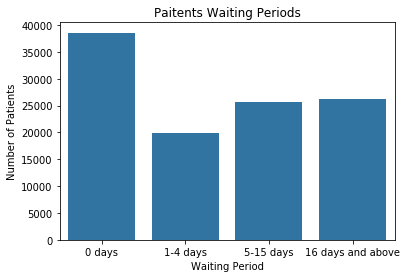

In [80]:
# plot a bar chart
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'waiting_period', color = base_color)
plt.title('Paitents Waiting Periods')
plt.xlabel('Waiting Period')
plt.ylabel('Number of Patients');


__Waiting Period:__ 
0 days = 38563; 1-4 days = 19965; 5-15 days = 25748; 16 days and above = 26246.

Most patients had zero waiting days.

__A view of the No-show status based on patients waiting period__

In [81]:
#grouping the appointments based on waiting period and no-show status
df.groupby(['waiting_period', 'no_show'])['appointment_id'].count()

waiting_period     no_show
0 days             No         36771
                   Yes         1792
1-4 days           No         15375
                   Yes         4590
5-15 days          No         18400
                   Yes         7348
16 days and above  No         17662
                   Yes         8584
Name: appointment_id, dtype: int64

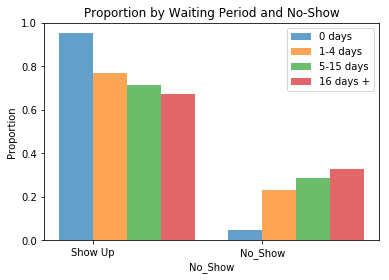

In [82]:
waiting_count = df.groupby(['waiting_period', 'no_show']).count()['appointment_id']
total_count = df.groupby(['waiting_period']).count()['appointment_id']
first_proportion = waiting_count['0 days']/total_count['0 days']
second_proportion = waiting_count['1-4 days']/total_count['1-4 days']
third_proportion = waiting_count['5-15 days']/total_count['5-15 days']
fourth_proportion = waiting_count['16 days and above']/total_count['16 days and above']

ind = np.arange(len(first_proportion))
width = 0.20

first_bars = plt.bar(ind, first_proportion, width, alpha=.7, label='0 days')
second_bars = plt.bar(ind + width, second_proportion, width, alpha=.7, label='1-4 days')
third_bars = plt.bar((ind + width)+ width, third_proportion, width, alpha=.7, label='5-15 days')
fourth_bars = plt.bar(((ind + width)+ width) + width, fourth_proportion, width, alpha=.7, label='16 days +')


# title and labels
plt.ylabel('Proportion')
plt.xlabel('No_Show')
plt.title('Proportion by Waiting Period and No-Show')
locations = ind + width / 2  # xtick locations
labels = ['Show Up', 'No_Show']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

__OBSERVATION:__ As the waiting period increased, more appointments were missed. Hence, waiting period is an important factor that can be used to predict if a patient will show up their appointment.

### Question 4: How does appointment day of the week affect showing up?

In [83]:
df['no_show'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

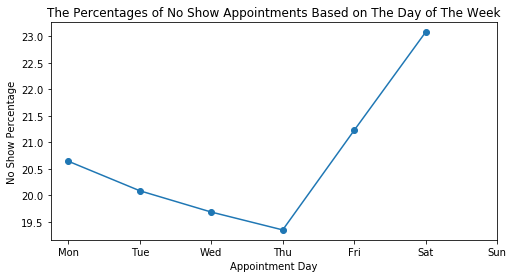

In [84]:
# percentages of no show appointments based on week day
no_show_perc_weekday = df.groupby('week_day').no_show.mean() * 100
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x = no_show_perc_weekday.index
y = no_show_perc_weekday
# plot a line plot
plt.figure(figsize = [8, 4])
plt.plot(x,  y, marker='o')
plt.title('The Percentages of No Show Appointments Based on The Day of The Week')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('Appointment Day')
plt.ylabel('No Show Percentage');


The top three days with highest percentage of no-show are Saturday (23%), Friday (21.2%) and Monday (20.7%). So we could say that patients are more likely to miss their appointment if it falls on weekends or a day before or after weekends. However, Thursday(19.4%) and Wednesday(19.4%) are the least likely days a patient would miss appointments.

### Question 5: What is the age distribution for show/no-show patients? What age-group is most likely to miss an app?

In [85]:
# view the min, 25%, 50%, 75%, max age values
df['age'].describe()


count    110522.00000
mean         37.12108
std          23.05926
min           1.00000
25%          18.00000
50%          37.00000
75%          55.00000
max         115.00000
Name: age, dtype: float64

Like i did with wait time, I will group age into 4 classes using the min, first, second and third quartiles, so it is easier to work with. The classes would be : '0-18 years', '19-37 years', '38-55 years' and '56 years and above'

In [86]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115]
# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df.insert(7, 'age_group', age_group)
df.head()

,appointment_id,gender,week_day,wait_time,age,neighbourhood,scholarship,age_group,waiting_period,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,4,0,62,JARDIM DA PENHA,0,56 and above,0 days,1,0,0,0,0,0
1,5642503,M,4,0,56,JARDIM DA PENHA,0,56 and above,0 days,0,0,0,0,0,0
2,5642549,F,4,0,62,MATA DA PRAIA,0,56 and above,0 days,0,0,0,0,0,0
3,5642828,F,4,0,8,PONTAL DE CAMBURI,0,0-18,0 days,0,0,0,0,0,0
4,5642494,F,4,0,56,JARDIM DA PENHA,0,56 and above,0 days,1,1,0,0,0,0


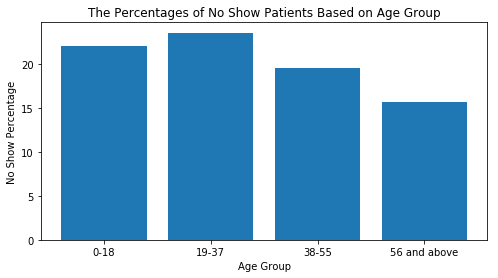

In [87]:
# percentages of no show patients based on age group
noshow_perc_age = df.groupby('age_group').no_show.mean() * 100

# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = noshow_perc_age.index, height = noshow_perc_age)
plt.title('The Percentages of No Show Patients Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage');


__OBSERVATIONS:__
* Patients within 19 - 37 years of age missed their appointments more.
* Very older patients (56 and above) had less no-show rate.

### Question 6: What are the top 5 Neighbourhoods Based on Number of No-Show Appointments?

In [88]:
# create a dataframe with only no show appointments
df_no_show = df[df.no_show == 1]

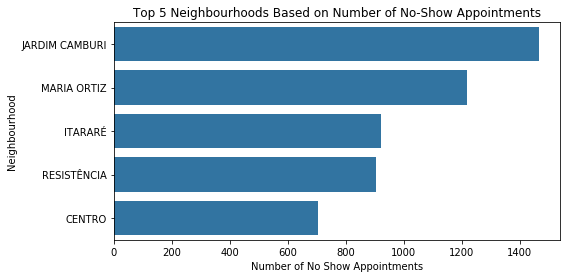

In [89]:
# plot a horizontal bar chart of the top 5 neighbourhoods
plt.figure(figsize = [8, 4])
cat_order = df_no_show['neighbourhood'].value_counts().index[:5]
sns.countplot(data = df_no_show, y = 'neighbourhood', color = base_color, order = cat_order)
plt.title('Top 5 Neighbourhoods Based on Number of No-Show Appointments')
plt.xlabel('Number of No Show Appointments')
plt.ylabel('Neighbourhood');

__OBSERVATIONS:__ 
    JARDIM CAMBURI had the highest no-show appointments. However, this can be attributed to the fact that the neighbourhood also had the highest number of appointments.

### Question 7: What other factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Now, we will look at other factors we have not examined so as to see their effect on no-show rate.

__A view of the amounts of appointments per characteristic__

In [90]:
def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

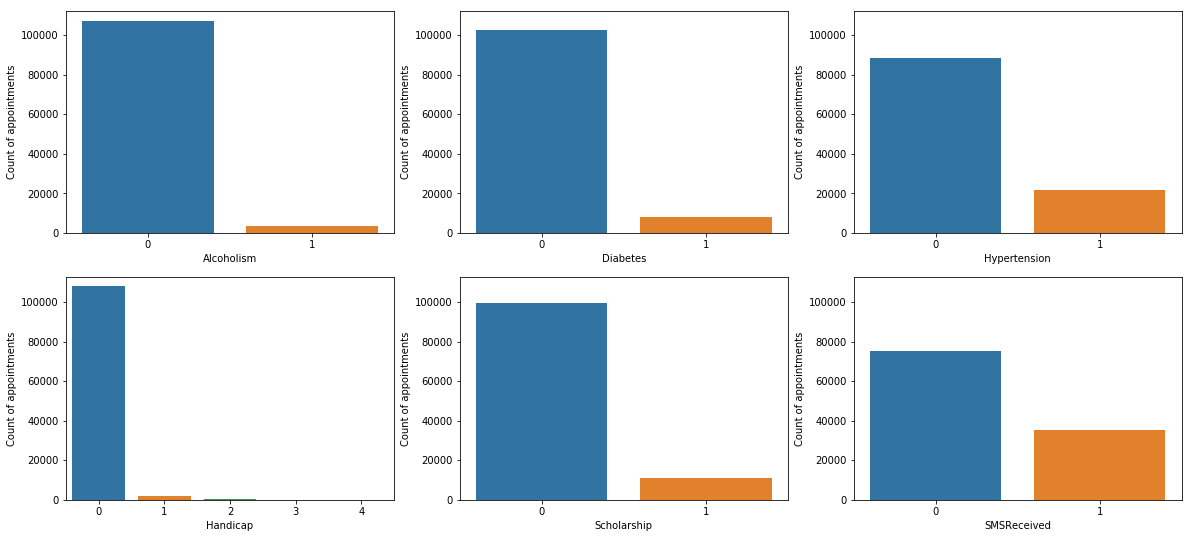

In [91]:
#subplots with amounts of appointments per characteristic value with Show up as '0' and No-show  as '1'.
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = count_plot(df, 'alcoholism', 'Alcoholism', 'Count of appointments', '')

plt.subplot(2, 3, 2)
count_plot(df, 'diabetes', 'Diabetes', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 3)
count_plot(df, 'hypertension', 'Hypertension', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 4)
count_plot(df, 'handicap', 'Handicap', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 5)
count_plot(df, 'scholarship', 'Scholarship', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 6)
count_plot(df, 'sms_received', 'SMSReceived', 'Count of appointments', '')
plt.ylim(g1.get_ylim())


plt.show()


From the bar charts above, we can see that:
    
* The number of patients with hypertension is greater than those with diabetes.
* A good number of patients recieved a reminder in form of an SMS.

__A view of the no show rates per characteristic__

In [92]:
# defining the barplot function
def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

In [93]:
# defining the plot details function to be used in the bar charts
def plot_details(plot):
    plot.set(ylim=(0,0.3))
    plot.axhline(0.202, color='black')
    plt.ylim(g1.get_ylim())

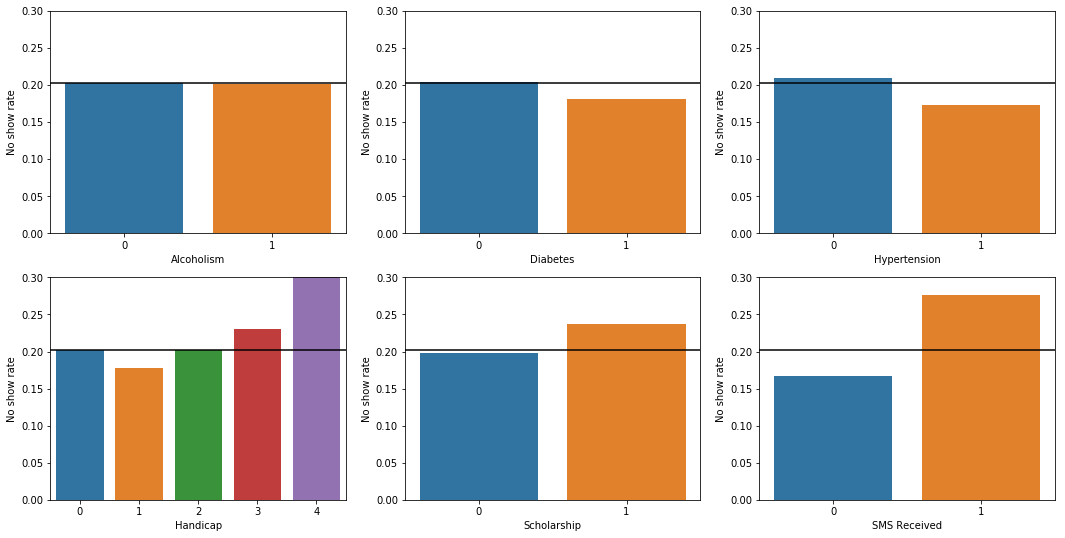

In [94]:
# subplots with no show rates per characteristic with Show up as '0' and No-show  as '1'.
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [18, 9])

plt.subplot(2, 3, 1)
g1 = bar_plot(df['alcoholism'], df['no_show'], 'Alcoholism', 'No show rate', '', 0)
plot_details(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df['diabetes'], df['no_show'], 'Diabetes', 'No show rate', '', 0)
plot_details(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df['hypertension'], df['no_show'], 'Hypertension', 'No show rate', '', 0)
plot_details(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df['handicap'], df['no_show'], 'Handicap', 'No show rate', '', 0)
plot_details(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df['scholarship'], df['no_show'], 'Scholarship', 'No show rate', '', 0)
plot_details(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df['sms_received'], df['no_show'], 'SMS Received', 'No show rate', '', 0)
plot_details(g6)

plt.show()



__OBSERVATIONS:__

* Just like gender, alcoholism does not have any effect on no-show rate. However, Those with alcoholism are more likely to miss appointments when compared with those with hypertension and diabietes.
* Patients with diabetes and hypertension have a lower no-show rate when compared to those without the diseases.
* As the handicap increased, so did the no-show rate increased. Hence patients with more than 2 handicap are less likely to show up for their appointment.
* Patients on scholarship had a higher no-show rate than those who are not on scholarship. 
* Patients who recieved SMS, had a higher no-show rate, this implies that SMS cannot be use to predict that a patient would show up, as other factors have higher effect on patients and can make the patient to still miss the appointment.

<a id='conclusions'></a>
## Conclusions

#### Question 1: How many percent of patients missed their scheduled appointment?
 20.2% of the appointments were missed (no_show) while 79.8% of the appointments were attended by the patients.

#### Question 2: What is gender distribution for show/no-show patients? Is gender an important factor to predict if a patient will show up for their scheduled appointment?
 Out of 71831 appointments made by females, 14588 (20%) were missed. Out of 38685 appointments made by males, 7723 (20%) were missed. Since the proportion of no-show patients based on gender was pretty close, we can say that gender can't be considered as a factor to predict if a patient will show up for their scheduled appointment.

####  Question 3: How does wait time affect showing up?
 As the waiting period increased, more appointments were missed. Hence, waiting period is an important factor that can be used to predict if a patient will show up their appointment.
 
####  Question 4: Does appointment day of the week affect showing up?
 Patients are more likely to miss their appointment if it falls on Saturday (23% no-show), Friday (21.2% no-show) and Monday (20.7% no-show). However, Thursday(19.4% no-show) and Wednesday(19.4% no-show) are the least likely days a patient would miss appointments.

#### Question 5: What is the age distribution for show/no-show patients? What age-group is most likely to miss an app?
Patients within 19 - 37 years of age missed their appointments more. Very older patients (56 and above) had the least no-show rate.

#### Question 6: What are the top 5 Neighbourhoods Based on Number of No-Show Appointments?
JARDIM CAMBURI, MARIA ORTIZ, ITARARE, RESISTENCIA, and CENTRO are the top 5 neighbourhoods based on the number of no-show appointments. However, these are also the top 5 locations in terms of appointment.

#### Question 7: What factors other are important for us to know in order to predict if a patient will show up for their scheduled appointment?
Special conditions like handicap, diabetes, hypertension or alcoholism will help predict if the patient will show up. 



## Summary:

* 20.2% of the appointments were missed.
* There is a correlation between no-show and wait_time.
* Patients within 19 - 37 years of age missed their appointments more.
* Patients with diabetes and hypertension have a lower no-show rate when compared to those without the diseases.
* Patients with more than 2 handicap are less likely to show up for their appointment.
* Patients with alcoholism are more likely to miss appointments when compared with those with hypertension and diabietes.
* Patients on scholarship had a higher no-show rate than those who are not on scholarship.


## Limitations:

* The dataset covers only the appointments received within a period of 40 days. A longer period could give better and more accurate results and insights.
* No appointment time was given. It was given an insight if the time of appointment contributed to the no-show rate.
